<a href="https://colab.research.google.com/github/mdikas/final-project-zenius-data-analysis/blob/main/Final_Project_Zenius_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler ,TomekLinks
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc, plot_confusion_matrix,plot_roc_curve,precision_recall_curve

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MSIB/Dataset/transactions.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Understanding

In [ ]:
# preview the dataset

df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [ ]:
# view summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
# Drop empty column

df = df.drop(columns=['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises',
                      'recurringAuthInd'])

In [ ]:
# Check missing values

df.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64

In [ ]:
# view dimensions of dataset

df.shape

(641914, 23)

In [ ]:
# drop row with null values
df = df.dropna()
 
# reset index
df = df.reset_index(drop = True)

In [ ]:
# Check missing values

df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64

Explore Categorical Variables

In [ ]:
# Find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('{} categorical variables\n'.format(len(categorical)))

9 categorical variables



In [ ]:
print('The categorical variables are :', categorical)

The categorical variables are : ['transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType']


In [ ]:
# find boolean variables

boolean = [var for var in df.columns if df[var].dtype=='bool']

print('{} boolean variables\n'.format(len(boolean)))

3 boolean variables



In [ ]:
print('The boolean variables are :', boolean)

The boolean variables are : ['isFraud', 'cardPresent', 'expirationDateKeyInMatch']


In [ ]:
# View the number of labels for each categorical variable

for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

transactionDateTime  contains  627556  labels
merchantName  contains  2491  labels
acqCountry  contains  4  labels
merchantCountryCode  contains  4  labels
merchantCategoryCode  contains  19  labels
currentExpDate  contains  165  labels
accountOpenDate  contains  1826  labels
dateOfLastAddressChange  contains  2186  labels
transactionType  contains  3  labels


Summary of categorical variables

* There are a total of 12 variables.
* There are 5 categorical variables (merchantName, acqCountry, merchantCountryCode, merchantCategoryCode, and transactionType).
* There are 4 date variables (transactionDateTime, currentExpDate, accountOpenDate, and dateOfLastAddressChange).
* There are 3 binary variables (isFraud, cardPresent, and expirationDateKeyInMatch.
* isFraud is the target variable.




Explore Numerical Variables

In [ ]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype=='int64' or df[var].dtype=='float64']

print('{} numerical variables\n'.format(len(numerical)))

11 numerical variables



In [ ]:
# view the numerical variables

df[numerical].head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
0,733493772,733493772,5000,5000.00,111.33,5.0,1.0,492,492,9184,0.00
1,733493772,733493772,5000,4888.67,24.75,9.0,1.0,492,492,9184,111.33
2,733493772,733493772,5000,4863.92,187.40,5.0,1.0,492,492,9184,136.08
3,733493772,733493772,5000,4676.52,227.34,2.0,1.0,492,492,9184,323.48
4,733493772,733493772,5000,4449.18,0.00,2.0,1.0,492,492,9184,550.82


Summary of numerical variables

* There are 11 numerical variables
* These are given by, accountNumber, customerId, creditLimit, availableMoney, transactionAmount, posEntryMode, posConditionCode, cardCVV, enteredCVV, cardLast4Digits, and currentBalance.

# Exploratory Data Analysis

### Visualization

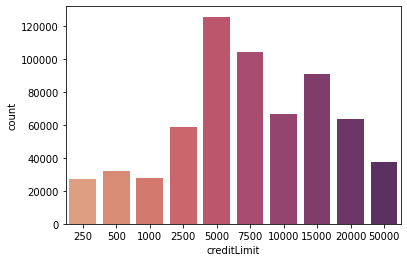

In [ ]:
sns.countplot(df['creditLimit'].sort_values().astype(str),palette="flare")

Most of the Credit Cards have 5000 as their limit, on second number it is 7500.

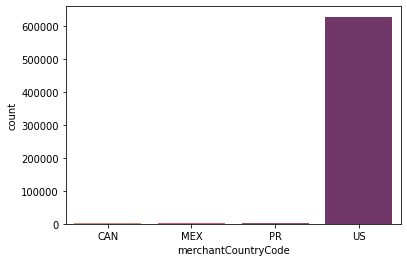

In [ ]:
sns.countplot(df['merchantCountryCode'].sort_values().astype(str),palette="flare")

4 Types of Merchant Country Code, where US is a dominant entity as shown.

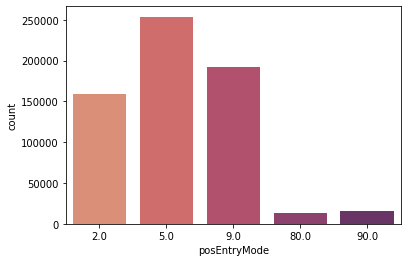

In [ ]:
sns.countplot(df['posEntryMode'].sort_values().astype(str),palette="flare")

5 POS Entry Mode where “05”, “09”, and “02” covers most of the values

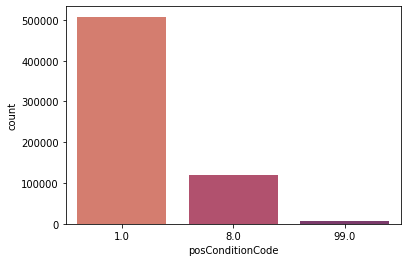

In [ ]:
sns.countplot(df['posConditionCode'].sort_values().astype(str),palette="flare")

3 POS Condition Mode exists where “01” is dominant among all


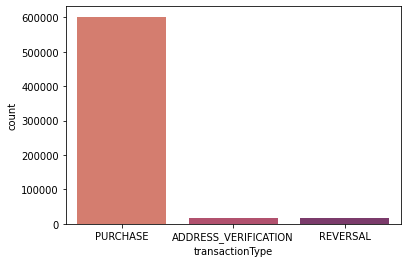

In [ ]:
sns.countplot(df['transactionType'],palette="flare")

There are 3 transaction types, where purchase type is the most dominant.

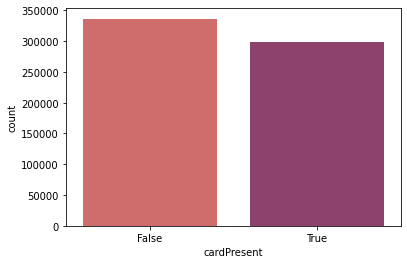

In [ ]:
sns.countplot(df['cardPresent'].astype(str),palette="flare")

If card is Present during the transaction.

[Text(0, 0, 'Lyft'),
 Text(0, 0, 'Uber'),
 Text(0, 0, 'gap.com'),
 Text(0, 0, 'target.com'),
 Text(0, 0, 'apple.com'),
 Text(0, 0, 'alibaba.com'),
 Text(0, 0, 'staples.com'),
 Text(0, 0, 'amazon.com'),
 Text(0, 0, 'ebay.com'),
 Text(0, 0, 'oldnavy.com')]

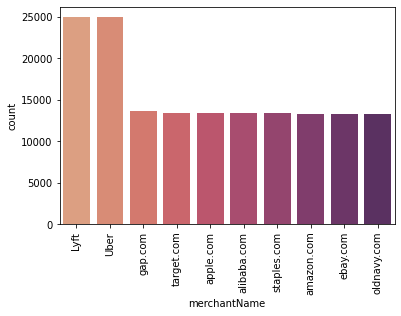

In [ ]:
ax = sns.countplot(df['merchantName'], palette="flare", order=df['merchantName'].sort_values().value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Top 10 Merchant by count

[Text(0, 0, 'online_retail'),
 Text(0, 0, 'fastfood'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'food'),
 Text(0, 0, 'rideshare'),
 Text(0, 0, 'online_gifts'),
 Text(0, 0, 'hotels'),
 Text(0, 0, 'fuel'),
 Text(0, 0, 'subscriptions'),
 Text(0, 0, 'personal care')]

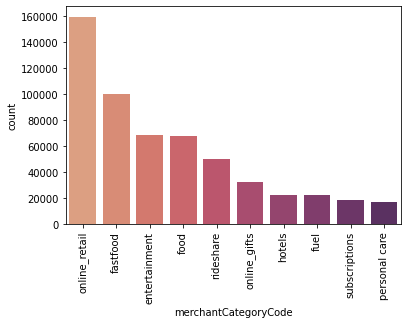

In [ ]:
ax = sns.countplot(df['merchantCategoryCode'], palette="flare", order=df['merchantCategoryCode'].sort_values().value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Top 10 Category

Histogram numerical variables

Text(0, 0.5, 'Count')

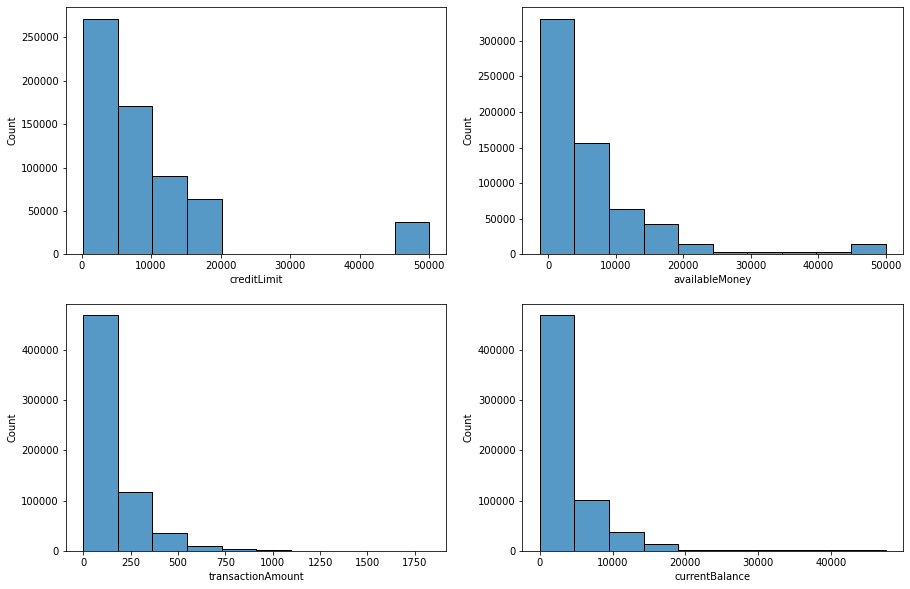

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.histplot(df['creditLimit'],bins=10)
fig.set_xlabel('creditLimit')
fig.set_ylabel('Count')

plt.subplot(2, 2, 2)
fig = sns.histplot(df['availableMoney'],bins=10)
fig.set_xlabel('availableMoney')
fig.set_ylabel('Count')

plt.subplot(2, 2, 3)
fig = sns.histplot(df['transactionAmount'],bins=10)
fig.set_xlabel('transactionAmount')
fig.set_ylabel('Count')

plt.subplot(2, 2, 4)
fig = sns.histplot(df['currentBalance'],bins=10)
fig.set_xlabel('currentBalance')
fig.set_ylabel('Count')

These Numerical Atrributes are Right Skewed

Boxplot numerical variables

Text(0.5, 1.0, 'currentBalance')

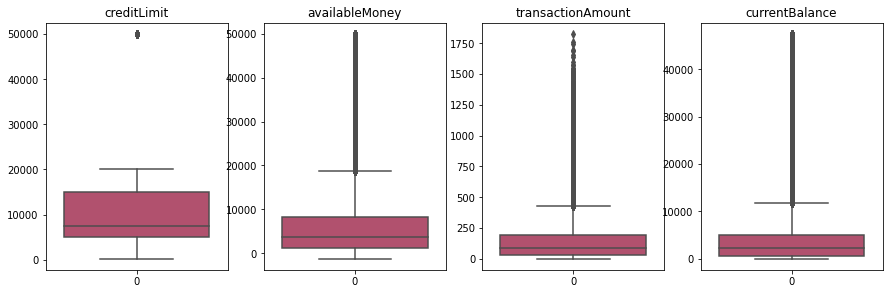

In [ ]:
# Box Plots help analyzing the Outliers in the datasets and the skewness

plt.figure(figsize=(15,10))


plt.subplot(2, 4, 1)
fig = sns.boxplot(data=df['creditLimit'],palette="flare")
fig.set_title('creditLimit')

plt.subplot(2, 4, 2)
fig = sns.boxplot(data=df['availableMoney'],palette="flare")
fig.set_title('availableMoney')

plt.subplot(2, 4, 3)
fig = sns.boxplot(data=df['transactionAmount'],palette="flare")
fig.set_title('transactionAmount')

plt.subplot(2, 4, 4)
fig = sns.boxplot(data=df['currentBalance'],palette="flare")
fig.set_title('currentBalance')

Plot Heatmap to see Correlation Matrix between these 4 Numerical Attributes.

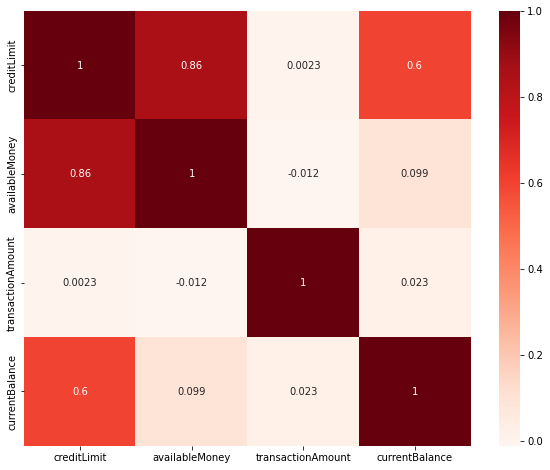

In [ ]:
num_c = ['creditLimit','availableMoney','transactionAmount','currentBalance']

plt.figure(figsize=(10,8))
sns.heatmap(df[num_c].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

## Data Wrangling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633846 entries, 0 to 633845
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             633846 non-null  int64  
 1   customerId                633846 non-null  int64  
 2   creditLimit               633846 non-null  int64  
 3   availableMoney            633846 non-null  float64
 4   transactionDateTime       633846 non-null  object 
 5   transactionAmount         633846 non-null  float64
 6   merchantName              633846 non-null  object 
 7   acqCountry                633846 non-null  object 
 8   merchantCountryCode       633846 non-null  object 
 9   posEntryMode              633846 non-null  float64
 10  posConditionCode          633846 non-null  float64
 11  merchantCategoryCode      633846 non-null  object 
 12  currentExpDate            633846 non-null  object 
 13  accountOpenDate           633846 non-null  o

In [ ]:
# Drop 3 date column and merchantName

df = df.drop(columns=['currentExpDate','accountOpenDate','dateOfLastAddressChange','merchantName'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633846 entries, 0 to 633845
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             633846 non-null  int64  
 1   customerId                633846 non-null  int64  
 2   creditLimit               633846 non-null  int64  
 3   availableMoney            633846 non-null  float64
 4   transactionDateTime       633846 non-null  object 
 5   transactionAmount         633846 non-null  float64
 6   acqCountry                633846 non-null  object 
 7   merchantCountryCode       633846 non-null  object 
 8   posEntryMode              633846 non-null  float64
 9   posConditionCode          633846 non-null  float64
 10  merchantCategoryCode      633846 non-null  object 
 11  cardCVV                   633846 non-null  int64  
 12  enteredCVV                633846 non-null  int64  
 13  cardLast4Digits           633846 non-null  i

Matched CVV

In [ ]:
# Make new column named 'matchedCVV' with the values are if cardCVV is equal to enteredCVV

df['matchedCVV'] = df['cardCVV'].eq(df['enteredCVV'])

In [ ]:
df['matchedCVV'].value_counts()

True     627976
False      5870
Name: matchedCVV, dtype: int64

In [ ]:
# Drop cardCVV and enteredCVV

df = df.drop(columns=['cardCVV','enteredCVV'])

Transaction Date Time

In [ ]:
# convert 'transactionDateTime' into datetime format

df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['transactionDateTime']

0        2016-01-08 19:04:50
1        2016-01-09 22:32:39
2        2016-01-11 13:36:55
3        2016-01-11 22:47:46
4        2016-01-16 01:41:11
                 ...        
633841   2016-12-04 12:29:21
633842   2016-12-09 04:20:35
633843   2016-12-16 07:58:23
633844   2016-12-19 02:30:35
633845   2016-12-28 11:14:14
Name: transactionDateTime, Length: 633846, dtype: datetime64[ns]

In [ ]:
# Extracting duplicate transactions
Duplicated = (df.sort_values(['transactionDateTime']).groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionDateTime'].diff().dt.total_seconds().lt(600))

In [ ]:
# make new column 'multiSwipe'

df['multiSwipe'] = Duplicated

In [ ]:
# extract transactionDateTime into year,month,week,day,hour,and minute

df['transaction_year'] = df['transactionDateTime'].dt.year
df['transaction_month'] = df['transactionDateTime'].dt.month
df['transaction_week'] = df['transactionDateTime'].dt.weekday
df['transaction_day'] = df['transactionDateTime'].dt.day
df['transaction_hour'] = df['transactionDateTime'].dt.hour
df['transaction_minute'] = df['transactionDateTime'].dt.minute

In [ ]:
# drop transactionDateTime

df = df.drop(columns=['transactionDateTime'])

In [ ]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,733493772,733493772,5000,5000.00,111.33,US,US,5.0,1.0,rideshare,...,False,False,True,False,2016,1,4,8,19,4
1,733493772,733493772,5000,4888.67,24.75,US,US,9.0,1.0,rideshare,...,False,False,True,False,2016,1,5,9,22,32
2,733493772,733493772,5000,4863.92,187.40,US,US,5.0,1.0,rideshare,...,False,False,True,False,2016,1,0,11,13,36
3,733493772,733493772,5000,4676.52,227.34,US,US,2.0,1.0,rideshare,...,False,False,True,False,2016,1,0,11,22,47
4,733493772,733493772,5000,4449.18,0.00,US,US,2.0,1.0,rideshare,...,False,False,True,False,2016,1,5,16,1,41


In [ ]:
# drop accountNumber and customerId

df = df.drop(columns=['accountNumber','customerId'])

In [ ]:
# show unique values acqCountry dan merchantCountryCode

df['acqCountry'].unique()

array(['US', 'PR', 'MEX', 'CAN'], dtype=object)

In [ ]:
df['merchantCountryCode'].unique()

array(['US', 'PR', 'MEX', 'CAN'], dtype=object)

In [ ]:
# Same label column handling (US,MEX,PR,CAN)

cols = []
for column in df.merchantCountryCode:
    if column == 'MEX':
      cols.append(f'MEX_{1}')
      continue
    elif column == 'US':
      cols.append(f'US_{1}')
      continue
    elif column == 'PR':
      cols.append(f'PR_{1}')
      continue 
    elif column == 'CAN':
      cols.append(f'CAN_{1}')
      continue 
    cols.append(column)
df.merchantCountryCode = cols

In [ ]:
df['merchantCountryCode'].unique()

array(['US_1', 'PR_1', 'MEX_1', 'CAN_1'], dtype=object)

In [ ]:
# Check missing values

df.isnull().sum()

creditLimit                 0
availableMoney              0
transactionAmount           0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
matchedCVV                  0
multiSwipe                  0
transaction_year            0
transaction_month           0
transaction_week            0
transaction_day             0
transaction_hour            0
transaction_minute          0
dtype: int64

In [ ]:
df.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardLast4Digits,transactionType,...,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,5000,5000.00,111.33,US,US_1,5.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,4,8,19,4
1,5000,4888.67,24.75,US,US_1,9.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,5,9,22,32
2,5000,4863.92,187.40,US,US_1,5.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,0,11,13,36
3,5000,4676.52,227.34,US,US_1,2.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,0,11,22,47
4,5000,4449.18,0.00,US,US_1,2.0,1.0,rideshare,9184,ADDRESS_VERIFICATION,...,False,False,True,False,2016,1,5,16,1,41


In [ ]:
# Convert column 'isFraud','cardPresent','expirationDateKeyInMatch' (Boolean) into str
# and convert column 'posEntryMode','posConditionCode' (int) into str

cnv_obj = ['posEntryMode','posConditionCode']

df[cnv_obj]=df[cnv_obj].astype(str)

In [ ]:
# refresh variable boolean

boolean = [var for var in df.columns if df[var].dtype=='bool']

print('{} boolean variables\n'.format(len(boolean)))

5 boolean variables



In [ ]:
boolean

['isFraud',
 'cardPresent',
 'expirationDateKeyInMatch',
 'matchedCVV',
 'multiSwipe']

In [ ]:
le = LabelEncoder()

In [ ]:
for col in boolean:
    df[col]=le.fit_transform(df[col])

In [ ]:
df[boolean].head()

,isFraud,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe
0,1,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,1,0
4,0,0,0,1,0


In [ ]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype=='int64' or df[var].dtype=='float64']

print('{} numerical variables\n'.format(len(numerical)))

16 numerical variables



In [ ]:
# Find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('{} categorical variables\n'.format(len(categorical)))

6 categorical variables



In [ ]:
categorical

['acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'transactionType']

In [ ]:
df = pd.concat([df[numerical],
                     pd.get_dummies(df.acqCountry,drop_first=True), 
                     pd.get_dummies(df.merchantCountryCode,drop_first=True),
                     pd.get_dummies(df.posEntryMode,drop_first=True),
                     pd.get_dummies(df.posConditionCode,drop_first=True),
                     pd.get_dummies(df.merchantCategoryCode,drop_first=True),
                     pd.get_dummies(df.transactionType,drop_first=True)], axis=1)

In [ ]:
df.head()

,creditLimit,availableMoney,transactionAmount,cardLast4Digits,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,...,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions,PURCHASE,REVERSAL
0,5000,5000.00,111.33,9184,1,0.00,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,5000,4888.67,24.75,9184,0,111.33,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,5000,4863.92,187.40,9184,0,136.08,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,5000,4676.52,227.34,9184,1,323.48,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,5000,4449.18,0.00,9184,0,550.82,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Classification Model

In [ ]:
def resampling(data,sampling_method) :
  X = data.drop(['isFraud'], axis=1)
  y = data['isFraud']

  X, y  = sampling_method.fit_resample(X, y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  cols = X_train.columns
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  X_train = pd.DataFrame(X_train, columns=[cols])
  X_test = pd.DataFrame(X_test, columns=[cols])

  return X_train,X_test,y_train, y_test 

## UnderSampling

In [ ]:
X_train,X_test,y_train,y_test  = resampling(df,RandomUnderSampler())

Logistic Regression

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))

model_names = ['LogisticRegression_UnderSampling']
underlog = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
underlog

,Accuracy,Recall,ROC_AUC,Precision
LogisticRegression_UnderSampling,0.68,0.71,0.75,0.67


              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2188
           1       0.67      0.71      0.69      2169

    accuracy                           0.68      4357
   macro avg       0.68      0.68      0.68      4357
weighted avg       0.68      0.68      0.68      4357



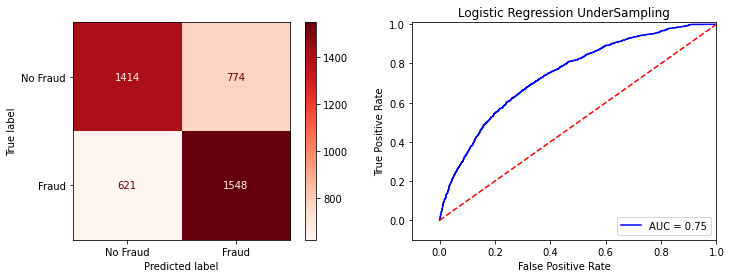

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(logreg, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Logistic Regression UnderSampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gradient Boosting

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

y_pred_prob = gb.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))


model_names = ['GradientBoosting_UnderSampling']
undergb = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
undergb

,Accuracy,Recall,ROC_AUC,Precision
GradientBoosting_UnderSampling,0.7,0.73,0.77,0.69


              precision    recall  f1-score   support

           0       0.71      0.67      0.69      2188
           1       0.69      0.73      0.71      2169

    accuracy                           0.70      4357
   macro avg       0.70      0.70      0.70      4357
weighted avg       0.70      0.70      0.70      4357



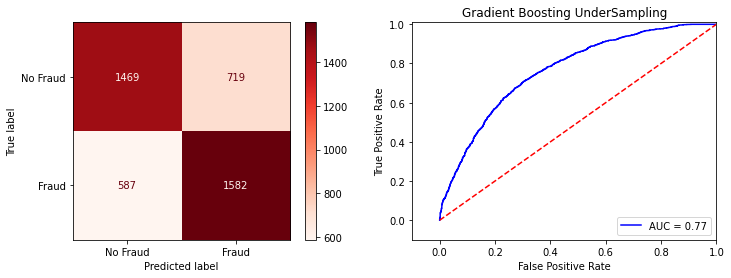

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(gb, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Gradient Boosting UnderSampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBoost Classifier

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


xgbc_base = XGBClassifier(random_state=0)
xgbc_base.fit(X_train,y_train)
y_pred = xgbc_base.predict(X_test)

y_pred_prob = xgbc_base.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))

model_names = ['XGBoost_UnderSampling']
underxgbc = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
underxgbc

,Accuracy,Recall,ROC_AUC,Precision
XGBoost_UnderSampling,0.7,0.73,0.77,0.69


              precision    recall  f1-score   support

           0       0.71      0.67      0.69      2188
           1       0.69      0.73      0.71      2169

    accuracy                           0.70      4357
   macro avg       0.70      0.70      0.70      4357
weighted avg       0.70      0.70      0.70      4357



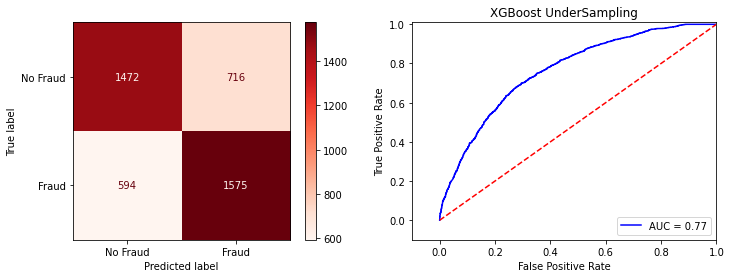

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(xgbc_base, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('XGBoost UnderSampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []

rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_pred_prob = rf.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))

model_names = ['RandomForest_UnderSampling']
underrf = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
underrf

,Accuracy,Recall,ROC_AUC,Precision
RandomForest_UnderSampling,0.71,0.74,0.78,0.69


              precision    recall  f1-score   support

           0       0.72      0.68      0.70      2188
           1       0.69      0.74      0.71      2169

    accuracy                           0.71      4357
   macro avg       0.71      0.71      0.71      4357
weighted avg       0.71      0.71      0.71      4357



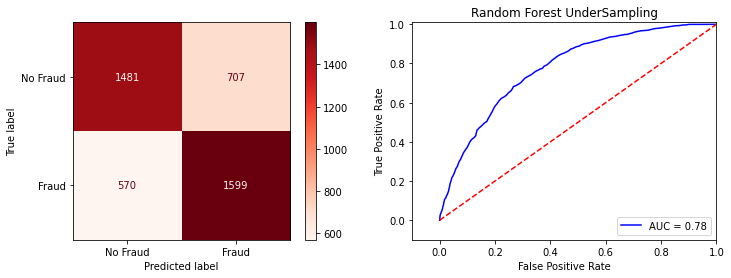

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(rf, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Random Forest UnderSampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## OverSampling

In [ ]:
X_train,X_test,y_train,y_test  = resampling(df,RandomOverSampler())

Logistic Regression

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))

model_names = ['LogisticRegression_OverSampling']
overlog = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
overlog

,Accuracy,Recall,ROC_AUC,Precision
LogisticRegression_OverSampling,0.68,0.72,0.74,0.67


              precision    recall  f1-score   support

           0       0.69      0.64      0.67    124177
           1       0.67      0.72      0.69    125005

    accuracy                           0.68    249182
   macro avg       0.68      0.68      0.68    249182
weighted avg       0.68      0.68      0.68    249182



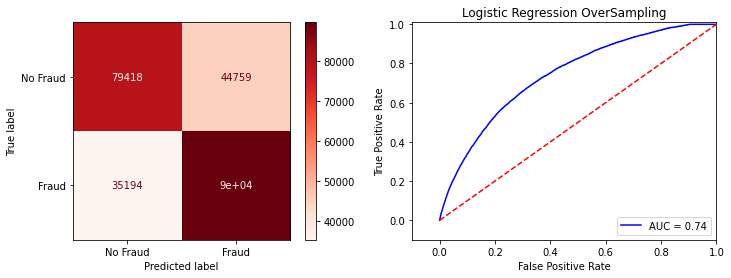

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(logreg, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Logistic Regression OverSampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gradient Boosting

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

y_pred_prob = gb.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))


model_names = ['GradientBoosting_OverSampling']
overgb = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
overgb

,Accuracy,Recall,ROC_AUC,Precision
GradientBoosting_OverSampling,0.7,0.71,0.77,0.69


              precision    recall  f1-score   support

           0       0.70      0.68      0.69    124177
           1       0.69      0.71      0.70    125005

    accuracy                           0.70    249182
   macro avg       0.70      0.70      0.70    249182
weighted avg       0.70      0.70      0.70    249182



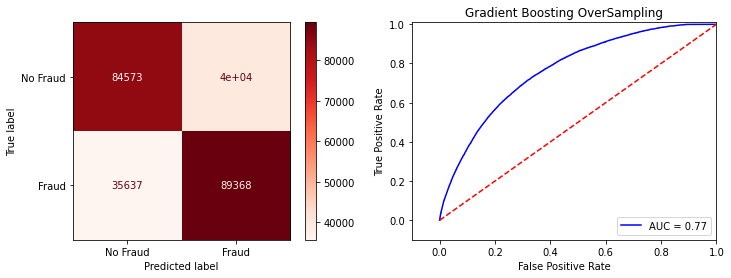

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(gb, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Gradient Boosting OverSampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBoost Classifier

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


xgbc_base = XGBClassifier(random_state=0)
xgbc_base.fit(X_train,y_train)
y_pred = xgbc_base.predict(X_test)

y_pred_prob = xgbc_base.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))

model_names = ['XGBoost_OverSampling']
overxgbc = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
overxgbc

,Accuracy,Recall,ROC_AUC,Precision
XGBoost_OverSampling,0.7,0.71,0.76,0.69


              precision    recall  f1-score   support

           0       0.70      0.68      0.69    124177
           1       0.69      0.71      0.70    125005

    accuracy                           0.70    249182
   macro avg       0.70      0.70      0.70    249182
weighted avg       0.70      0.70      0.70    249182



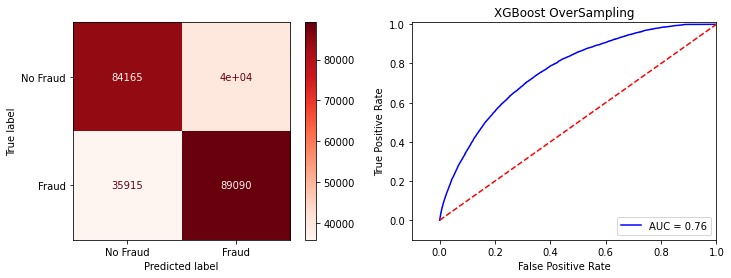

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(xgbc_base, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('XGBoost OverSampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []

rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_pred_prob = rf.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))

model_names = ['RandomForest_OverSampling']
overrf = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
overrf

,Accuracy,Recall,ROC_AUC,Precision
RandomForest_OverSampling,1.0,1.0,1.0,1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124177
           1       1.00      1.00      1.00    125005

    accuracy                           1.00    249182
   macro avg       1.00      1.00      1.00    249182
weighted avg       1.00      1.00      1.00    249182



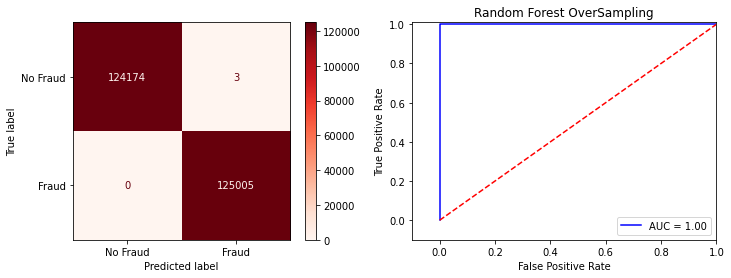

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(rf, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Random Forest OverSampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SMOTE

In [ ]:
X_train,X_test,y_train,y_test  = resampling(df,SMOTE())

Logistic Regression

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))

model_names = ['LogisticRegression_SMOTE']
smotelog = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
smotelog

,Accuracy,Recall,ROC_AUC,Precision
LogisticRegression_SMOTE,0.87,0.85,0.95,0.89


              precision    recall  f1-score   support

           0       0.86      0.89      0.87    124177
           1       0.89      0.85      0.87    125005

    accuracy                           0.87    249182
   macro avg       0.87      0.87      0.87    249182
weighted avg       0.87      0.87      0.87    249182



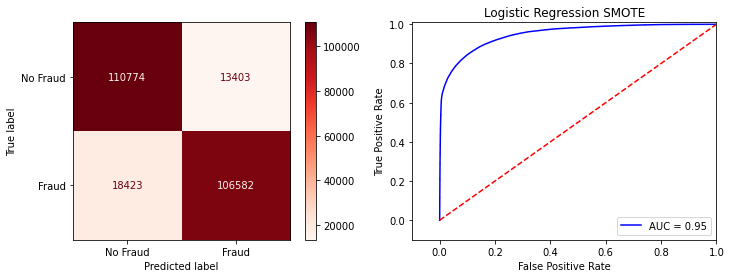

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(logreg, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Logistic Regression SMOTE')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gradient Boosting

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

y_pred_prob = gb.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))


model_names = ['GradientBoosting_SMOTE']
smotegb = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
smotegb

,Accuracy,Recall,ROC_AUC,Precision
GradientBoosting_SMOTE,0.88,0.89,0.95,0.87


              precision    recall  f1-score   support

           0       0.89      0.87      0.88    124177
           1       0.87      0.89      0.88    125005

    accuracy                           0.88    249182
   macro avg       0.88      0.88      0.88    249182
weighted avg       0.88      0.88      0.88    249182



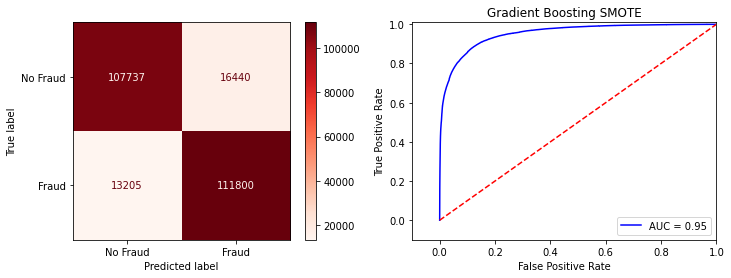

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(gb, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Gradient Boosting SMOTE')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBoost Classifier

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []


xgbc_base = XGBClassifier(random_state=0)
xgbc_base.fit(X_train,y_train)
y_pred = xgbc_base.predict(X_test)

y_pred_prob = xgbc_base.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))

model_names = ['XGBoost_SMOTE']
smotexgbc = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
smotexgbc

,Accuracy,Recall,ROC_AUC,Precision
XGBoost_SMOTE,0.88,0.9,0.95,0.87


              precision    recall  f1-score   support

           0       0.89      0.86      0.88    124177
           1       0.87      0.90      0.88    125005

    accuracy                           0.88    249182
   macro avg       0.88      0.88      0.88    249182
weighted avg       0.88      0.88      0.88    249182



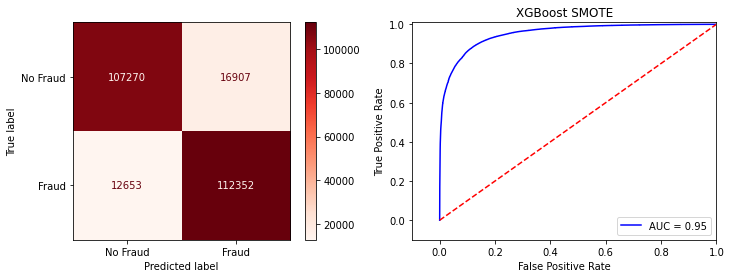

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(xgbc_base, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('XGBoost SMOTE')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [ ]:
accuracy= []
recall =[]
auc= []
precision = []

rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_pred_prob = rf.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),2))
recall.append(round(recall_score(y_test, y_pred),2))
auc.append(round(roc_auc_score(y_test,y_pred_prob),2))
precision.append(round(precision_score(y_test, y_pred),2))

model_names = ['RandomForest_SMOTE']
smoterf = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'ROC_AUC':auc, 'Precision':precision}, index=model_names)
smoterf

,Accuracy,Recall,ROC_AUC,Precision
RandomForest_SMOTE,0.98,0.98,1.0,0.98


              precision    recall  f1-score   support

           0       0.98      0.98      0.98    124177
           1       0.98      0.98      0.98    125005

    accuracy                           0.98    249182
   macro avg       0.98      0.98      0.98    249182
weighted avg       0.98      0.98      0.98    249182



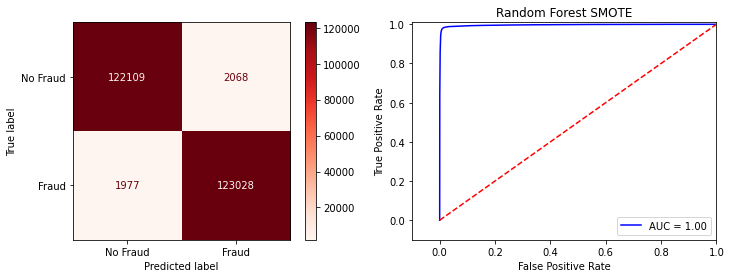

In [ ]:
Conf_Mat = confusion_matrix(y_test, y_pred)
figs, axes = plt.subplots(1,2, figsize=(12,4))
labels = ['No Fraud', 'Fraud']
disp = plot_confusion_matrix(rf, X_test, y_test, display_labels=labels, cmap=plt.cm.Reds, ax=axes[0])

Class_rep = classification_report(y_test, y_pred)
print(Class_rep)

fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
plt.title('Random Forest SMOTE')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred_prob))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Result

In [ ]:
result_df = pd.concat([underlog,overlog,smotelog,undergb,overgb,smotegb,underxgbc,overxgbc,smotexgbc,underrf,overrf,smoterf],axis=0)

In [ ]:
result_df

,Accuracy,Recall,ROC_AUC,Precision
LogisticRegression_UnderSampling,0.68,0.71,0.75,0.67
LogisticRegression_OverSampling,0.68,0.72,0.74,0.67
LogisticRegression_SMOTE,0.87,0.85,0.95,0.89
GradientBoosting_UnderSampling,0.70,0.73,0.77,0.69
GradientBoosting_OverSampling,0.70,0.71,0.77,0.69
GradientBoosting_SMOTE,0.88,0.89,0.95,0.87
XGBoost_UnderSampling,0.70,0.73,0.77,0.69
XGBoost_OverSampling,0.70,0.71,0.76,0.69
XGBoost_SMOTE,0.88,0.90,0.95,0.87
RandomForest_UnderSampling,0.71,0.74,0.78,0.69
